In [18]:
pip install kagglehub


Note: you may need to restart the kernel to use updated packages.


In [19]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from itertools import combinations
pd.set_option('display.max_columns', None)


In [20]:
path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

In [21]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\panac\.cache\kagglehub\datasets\osmi\mental-health-in-tech-survey\versions\3


In [22]:
df_mh = pd.read_csv("../files/survey.csv")
df_mh.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [23]:
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [24]:
df_mh_ca= df_mh[df_mh["state"]== "CA"]

df_mh_ca

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
24,2014-08-27 11:36:48,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,No,Yes,Yes,Not sure,Don't know,Yes,Yes,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
27,2014-08-27 11:37:59,35,Female,United States,CA,No,Yes,Yes,Rarely,6-25,Yes,Yes,Yes,Yes,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
65,2014-08-27 11:51:07,40,Male,United States,CA,No,Yes,No,Sometimes,More than 1000,Yes,Yes,Yes,Yes,Yes,Yes,Don't know,Don't know,Yes,Maybe,Some of them,No,No,No,No,Yes,NaN
74,2014-08-27 11:56:29,33,Male,United States,CA,No,No,No,Never,More than 1000,No,Yes,Don't know,Not sure,Yes,Don't know,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,2015-02-21 10:00:50,46,Male,United States,CA,No,Yes,Yes,Often,26-100,No,Yes,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,Yes,Yes,Don't know,No,Yes,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1249,2015-07-22 18:57:54,30,M,United States,CA,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Yes,Don't know,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Bipolar disorder
1250,2015-07-27 23:25:34,30,Male,United States,CA,Yes,Yes,Yes,Often,26-100,No,Yes,Yes,Not sure,Yes,Yes,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN


In [25]:
for c in df_mh_ca.columns:
    print(f"Valores únicos {c}:\n", df_mh_ca[f"{c}"].unique())

Valores únicos Timestamp:
 ['2014-08-27 11:33:23' '2014-08-27 11:36:48' '2014-08-27 11:37:59'
 '2014-08-27 11:51:07' '2014-08-27 11:56:29' '2014-08-27 12:05:13'
 '2014-08-27 12:31:02' '2014-08-27 12:35:23' '2014-08-27 12:40:53'
 '2014-08-27 12:42:52' '2014-08-27 12:44:51' '2014-08-27 12:48:29'
 '2014-08-27 12:51:25' '2014-08-27 12:51:55' '2014-08-27 12:53:13'
 '2014-08-27 12:54:11' '2014-08-27 12:55:38' '2014-08-27 13:32:48'
 '2014-08-27 13:42:38' '2014-08-27 13:55:16' '2014-08-27 14:14:52'
 '2014-08-27 14:15:21' '2014-08-27 14:16:00' '2014-08-27 14:18:41'
 '2014-08-27 14:18:44' '2014-08-27 14:20:08' '2014-08-27 14:21:42'
 '2014-08-27 14:25:54' '2014-08-27 14:26:32' '2014-08-27 14:28:43'
 '2014-08-27 14:28:51' '2014-08-27 14:29:19' '2014-08-27 14:30:33'
 '2014-08-27 14:31:28' '2014-08-27 14:38:13' '2014-08-27 14:39:20'
 '2014-08-27 14:45:45' '2014-08-27 14:47:10' '2014-08-27 14:47:28'
 '2014-08-27 14:52:44' '2014-08-27 14:53:11' '2014-08-27 15:11:30'
 '2014-08-27 15:22:26' '2014-08-27 

In [26]:
df_mh_ca = df_mh_ca.drop("Timestamp", axis = 1)
df_mh_ca = df_mh_ca.drop("tech_company", axis = 1)


In [27]:
df_mh_ca.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [28]:
df_mh_ca.columns = df_mh_ca.columns.str.lower()

In [29]:
def map_gender(g):
    g = str(g).strip().lower()
    
    if g in ['male', 'm', 'man', 'Make', "Male", "M"]:
        return 'male'
    elif g in ['female', 'f', 'Woman', 'female (trans)', 'Female (cis)', "Female", "F"]:
        return 'female'
    else:
        return 'other'

# Aplicar a la columna 'gender' (ajusta el nombre si es distinto)
df_mh_ca['gender'] = df_mh_ca['gender'].apply(map_gender)
df_mh_ca['gender'].value_counts()

gender
male      93
female    40
other      5
Name: count, dtype: int64

In [30]:
df_mh_ca.describe(include="O").T

,count,unique,top,freq
gender,138,3,male,93
country,138,1,United States,138
state,138,1,CA,138
self_employed,137,2,No,127
family_history,138,2,No,70
treatment,138,2,Yes,86
work_interfere,117,4,Sometimes,59
no_employees,138,6,More than 1000,68
remote_work,138,2,No,118
benefits,138,3,Yes,84


In [31]:
porcentaje_nulos = round(df_mh_ca.isnull().mean() * 100, 2)

porcentaje_nulos

age                           0.00
gender                        0.00
country                       0.00
state                         0.00
self_employed                 0.72
family_history                0.00
treatment                     0.00
work_interfere               15.22
no_employees                  0.00
remote_work                   0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
comments                     88.41
dtype: float64

In [32]:
df_mh_ca["comments"].unique()

array([nan, 'Relatively new job. Ask again later',
       'In small startups it is very hard to keep mental health issues truly private no matter what management does.',
       "Don't know because I haven't checked not because it's difficult to find out. If you didn't have the don't know option I would've looked up the answer.",
       "Regardless of a stated lack of negative consequences for discussing mental health issues with coworkers/superiors unconscious bias is a very real thing - as long as I don't *need* to inform my co-workers my mental health issues do not need to be public knowledge.",
       "I'm troubled by the way that our hiring process tends to filter out non-neurotypicals of all stripes. Competent people who act a little funny can be hard to hire.",
       "I talked to a psychiatrist once about taking medical leave for mental health issues with his referral. He was willing to help but warned me that I may not want to as he's seen that sort of thing follow people throu

In [33]:
nulls = df_mh_ca.isna()
nulls

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
65,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
74,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1249,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [34]:
df_null_wi = df_mh_ca[df_mh_ca["work_interfere"].isna()]

df_null_wi

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
167,42,male,United States,CA,No,No,No,NaN,6-25,No,No,Yes,No,No,Don't know,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
295,24,female,United States,CA,No,No,No,NaN,500-1000,No,Don't know,Not sure,No,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,Maybe,No,No,NaN
297,60,male,United States,CA,No,No,No,NaN,More than 1000,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
314,27,male,United States,CA,No,Yes,No,NaN,More than 1000,No,Don't know,No,Don't know,Don't know,Don't know,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Don't know because I haven't checked not becau...
325,25,male,United States,CA,No,No,No,NaN,More than 1000,No,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No,NaN
366,35,male,United States,CA,No,Yes,No,NaN,More than 1000,No,Yes,No,Yes,Yes,Yes,Very easy,No,No,Some of them,Yes,No,No,Don't know,No,NaN
402,23,male,United States,CA,No,No,No,NaN,More than 1000,No,Don't know,No,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,No,NaN
405,26,male,United States,CA,No,Yes,No,NaN,6-25,No,Yes,Yes,No,Yes,Yes,Very easy,No,No,Some of them,Yes,Maybe,Maybe,No,No,NaN
407,33,male,United States,CA,No,No,No,NaN,More than 1000,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,Yes,No,Some of them,No,No,Maybe,Yes,No,NaN
490,31,male,United States,CA,No,No,No,NaN,More than 1000,No,Yes,Not sure,Don't know,Don't know,Yes,Don't know,No,No,No,Some of them,No,No,Yes,No,NaN


In [35]:
df_mh_ca["work_interfere"] =df_mh_ca["work_interfere"].fillna("Unknown")

In [36]:
df_mh_ca

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
12,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,No,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
24,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,No,Yes,Not sure,Don't know,Yes,Yes,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
27,35,female,United States,CA,No,Yes,Yes,Rarely,6-25,Yes,Yes,Yes,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
65,40,male,United States,CA,No,Yes,No,Sometimes,More than 1000,Yes,Yes,Yes,Yes,Yes,Don't know,Don't know,Yes,Maybe,Some of them,No,No,No,No,Yes,NaN
74,33,male,United States,CA,No,No,No,Never,More than 1000,No,Don't know,Not sure,Yes,Don't know,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,46,male,United States,CA,No,Yes,Yes,Often,26-100,No,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
1236,60,male,United States,CA,No,No,Yes,Often,More than 1000,Yes,Don't know,No,Yes,Don't know,Don't know,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1249,30,male,United States,CA,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Don't know,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Bipolar disorder
1250,30,male,United States,CA,Yes,Yes,Yes,Often,26-100,No,Yes,Not sure,Yes,Yes,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN


In [37]:
df_mh_ca.groupby("work_interfere")[["leave", "mental_health_consequence"]].value_counts().sort_values(ascending=False).reset_index()

,work_interfere,leave,mental_health_consequence,count
0,Sometimes,Don't know,Maybe,13
1,Never,Don't know,Maybe,9
2,Unknown,Don't know,No,8
3,Sometimes,Somewhat difficult,Yes,7
4,Sometimes,Don't know,Yes,7
5,Rarely,Don't know,No,6
6,Sometimes,Don't know,No,6
7,Sometimes,Somewhat easy,No,5
8,Unknown,Very easy,No,5
9,Unknown,Don't know,Maybe,5


Perfil salud mental de los encuestados  

In [49]:
df_mh_ca.columns

Index(['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [50]:
df_mh_ca_profile = df_mh_ca[['age', 'gender', 'self_employed', 'family_history','treatment', 'remote_work']]

In [51]:
df_mh_ca_profile

,age,gender,self_employed,family_history,treatment,remote_work
12,42,female,NaN,Yes,Yes,No
24,33,male,No,Yes,Yes,No
27,35,female,No,Yes,Yes,Yes
65,40,male,No,Yes,No,Yes
74,33,male,No,No,No,No
...,...,...,...,...,...,...
1220,46,male,No,Yes,Yes,No
1236,60,male,No,No,Yes,Yes
1249,30,male,No,Yes,Yes,No
1250,30,male,Yes,Yes,Yes,No


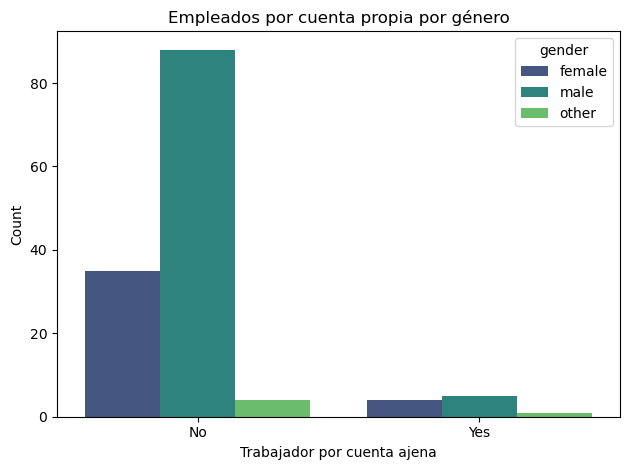

In [58]:
sns.countplot(
    data = df_mh_ca_profile,
    x='self_employed',
    hue="gender",
    palette = "viridis"
)

plt.title('Empleados por cuenta propia por género')
plt.ylabel('Count')
plt.xlabel('Trabajador por cuenta ajena')
plt.xticks(rotation=0)
plt.errorbar= None,
plt.tight_layout()
plt.show()

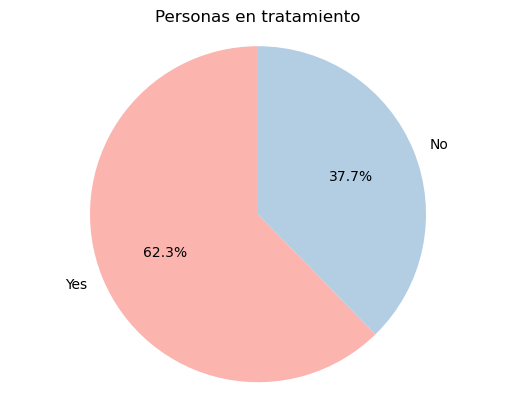

In [95]:
df_pie_trat = df_mh_ca_profile['treatment'].value_counts()


plt.pie(
    df_pie_trat.values,
    labels=df_pie_trat.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)

plt.title('Personas en tratamiento')
plt.axis('equal')  
plt.show()

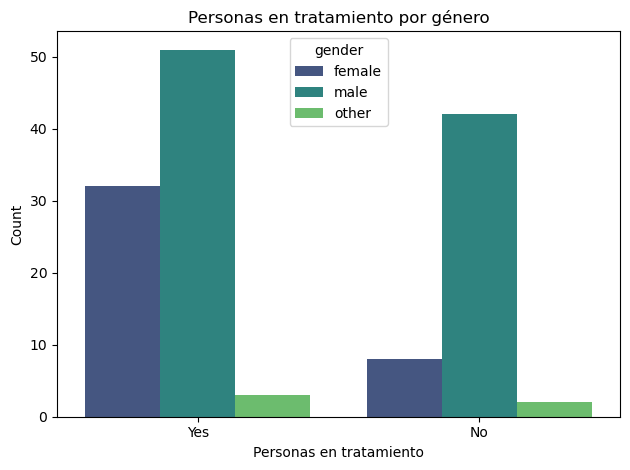

In [59]:
sns.countplot(
    data = df_mh_ca_profile,
    x='treatment',
    hue="gender",
    palette = "viridis"
)

plt.title('Personas en tratamiento por género')
plt.ylabel('Count')
plt.xlabel('Personas en tratamiento')
plt.xticks(rotation=0)
plt.errorbar= None,
plt.tight_layout()
plt.show()

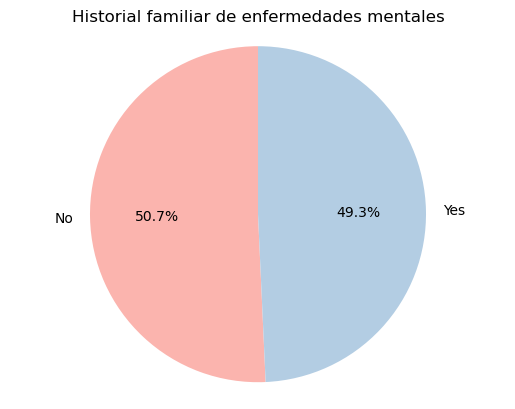

In [93]:
df_pie_fam = df_mh_ca_profile['family_history'].value_counts()


plt.pie(
    df_pie_fam.values,
    labels=df_pie_fam.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)

plt.title('Historial familiar de enfermedades mentales')
plt.axis('equal')  
plt.show()

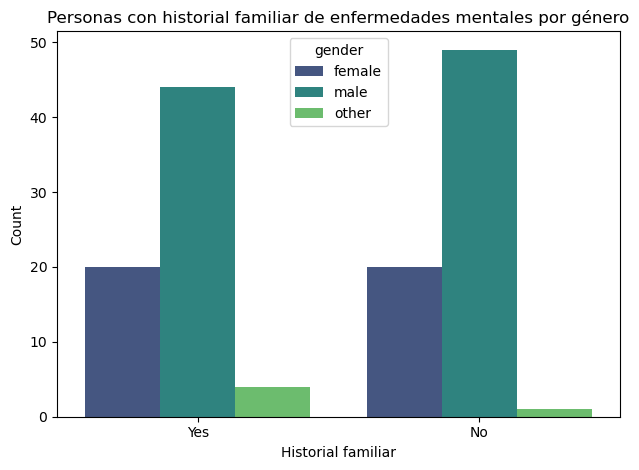

In [60]:
sns.countplot(
    data = df_mh_ca_profile,
    x='family_history',
    hue="gender",
    palette = "viridis"
)

plt.title('Personas con historial familiar de enfermedades mentales por género')
plt.ylabel('Count')
plt.xlabel('Historial familiar')
plt.xticks(rotation=0)
plt.errorbar= None,
plt.tight_layout()
plt.show()

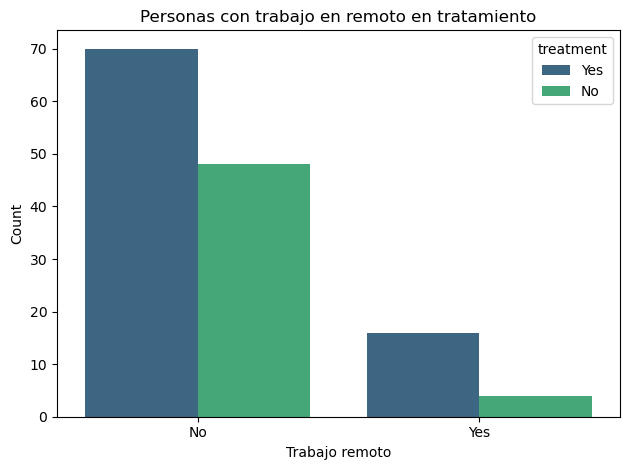

In [62]:
sns.countplot(
    data = df_mh_ca_profile,
    x='remote_work',
    hue="treatment",
    palette = "viridis"
)

plt.title('Personas con trabajo en remoto en tratamiento')
plt.ylabel('Count')
plt.xlabel('Trabajo remoto')
plt.xticks(rotation=0)
plt.errorbar= None,
plt.tight_layout()
plt.show()

C:\Users\panac\AppData\Local\Temp\ipykernel_22272\2627003992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


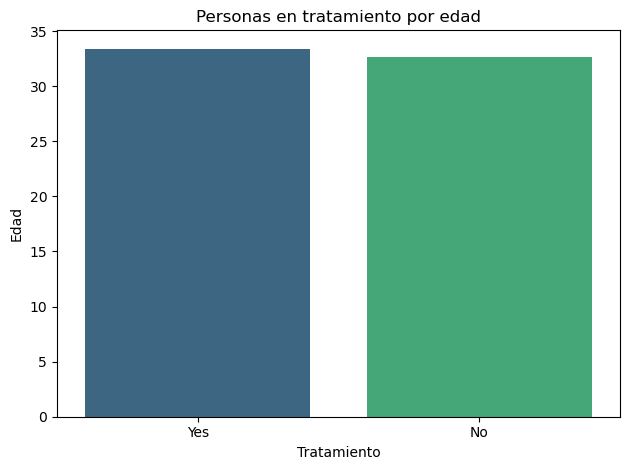

In [70]:
sns.barplot(
    data = df_mh_ca_profile,
    y='age',
    x="treatment",
    palette = "viridis",
    errorbar= None
)

plt.title('Personas en tratamiento por edad')
plt.ylabel('Edad')
plt.xlabel('Tratamiento')
plt.xticks(rotation=0),
plt.tight_layout()
plt.show()

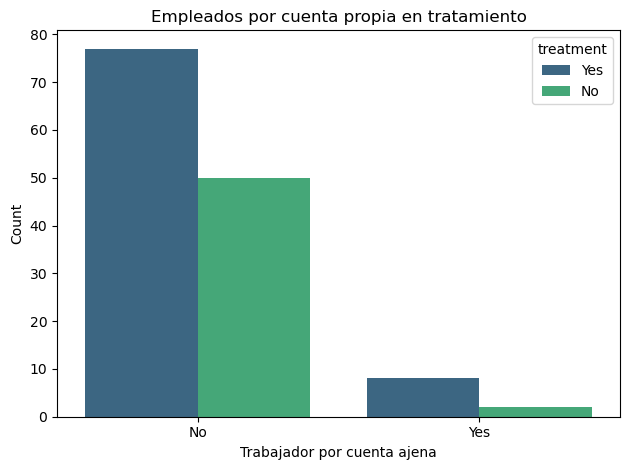

In [ ]:
sns.countplot(
    data = df_mh_ca_profile,
    x='self_employed',
    hue="treatment",
    palette = "viridis"
)

plt.title('Empleados por cuenta propia en tratamiento')
plt.ylabel('Count')
plt.xlabel('Trabajador por cuenta propia')
plt.xticks(rotation=0),
plt.tight_layout()
plt.show()